# Medical appointment no-shows
This analysis is part of the Udacity Data Analysis Nanodegree program and aims to explore a dataset containing aproximately 100k medical appointments from the Brazilian public health system. It is basically divided into four sections: (1) *Introduction*, where the investigation problem is set and the dataset is described; (2) *Data Wrangling*, where the acquired data are cleaned and parsed; (3) *Exploratory Data Analysis*, in which some intuition about the data are built based on the found patterns; (4) *Conclusion*, where the found insights about the problem are reviewed and communicated.  

Those readers not interested in the whole data analysis process may read <a href="#intro">Section 1</a>, to get familiar with the data and the investigation problem and then jump directly to <a href="#conclusions">Section 4</a> to find out the analysis results.

## Table of Contents
* <a href="#intro">1. Introduction</a>
  * <a href="#sec1.1"> 1.1. Initial statements </a>
  * <a href="#sec1.2"> 1.2. Understanding the data </a>
  * <a href="#sec1.3"> 1.3. Hypothesis to be explored </a>
* <a href="#wrangling">2. Data Wrangling</a>
  * <a href="#sec2.1"> 2.1. General properties </a>
  * <a href="#sec2.2"> 2.2. Numerical attributes and outliers</a>
    * <a href="#sec2.2.1"> PatientID</a>
    * <a href="#sec2.2.2"> AppointmentID</a>   
    * <a href="#sec2.2.3"> Checking the Age attribute</a>   
    * <a href="#sec2.2.4"> Checking the Handcap attribute</a>   
  * <a href="#sec2.3"> 2.3. Categorical attributes</a>
    * <a href="#sec2.3.1"> Gender attribute</a>   
    * <a href="#sec2.3.2"> Schedule and appointment date</a>
    * <a href="#sec2.3.3"> Waiting days</a>
    * <a href="#sec2.3.4"> Neighborhood names</a>
    * <a href="#sec2.3.5"> No-show class</a>
  * <a href="#sec2.4"> 2.4. Data wrangling overview</a>
* <a href="#eda">3. Exploratory Data Analysis</a>
  * <a href="#EDA_question1">3.1. Exploring no-showing appointments</a>
    * <a href="#sec3.1.1"> Waiting time between the scheduling and the appointment date </a>
    * <a href="#sec3.1.2"> A return to assiduity </a>
    * <a href="#sec3.1.3"> Neighborhood analysis </a>
    
  * <a href="#EDA_question2">3.2. Exploring the patient profiles</a>
    * <a href="#sec3.2.1"> </a>
* <a href="#conclusions">4. Conclusions</a>
* <a href="#references">References</a>

<a id='intro'></a>
## 1. Introduction

The Brazilian public health system, known as SUS for *Unified Health System* in its acronym in Portuguese, is one of the largest health system in the world <a href="#[1]">[1]</a>, representing government investment of more than 9% of GDP. However, its operation is not homogeneous and there are distinct perceptions of quality from citizens in different regions of the country.

This analysis will use the *no-show appointments dataset* which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, including a set of characteristics about the patient in each row:
- ‘ScheduledDay’: tells us on which day the patient set up their appointment.  
- ‘Neighborhood’: indicates the location of the hospital.  
- ‘Scholarship’: indicates whether or not the patient is enrolled in Brasilian welfare program called *Bolsa Família*.
- 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

This analysis aims to outline some possible reasons for patient no-showing at the scheduled appointments, as well as get insights about the Brazilian public health system. To accomplish this, we will first try to understand the data and the context on which they were collected. We will then proceed to data wrangling and exploratory data analysis, in an iterative process, in order to draw some conclusions about the subject.

<a id='sec1.1'></a>
### 1.1. Initial statements
This section sets up import statements for all the packages that will be used throughout this python notebook.

In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/tbnsilveira/anaconda3/envs/analytics3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<a id='sec1.2'></a>
### 1.2. Understanding the data
Since the original dataset is available at Kaggle <a href="#[2]">[2]</a>, the first step was to get additional information available on its original repository, as transcripted below:

>In response here it goes: Country? Brazil. Is this from private or public service? Or both? Public Sector (Brazil). Primary, secondary, or tertiary care? Primary care, not sure about it. Only physicians? What would be the specialties? We don't have these information.
  
>First appointment with that specific professional? I believe first appointments are prone to "no show". That is a very good hint, we don't have that information yet. Part of the day? Early morning might be worse. (Perhaps in the next version we can include it.

Another relevant point is that any information is provided about the source of data. I.e., did these data come from a government agency or were they a compilation from each health unit? Furthermore, besides it is known the data is about public health unit, it is not said from which government sphere they belong to (municipal, state or federal). 
The absence of such information can result in a biased analysis, since the complex and decentralized Brazilian health system brings inevitable conflicts and contradictions between its associated entities, as identified in <a href="#[3]">[3]</a>.

This question regarding the data source was made at the Kaggle discussion forum (available at https://goo.gl/JB4P4d), on which the following answer were given: 
> This is at municipal level combining the appointments occurred in more then 45 units. As far as we know, the city has 20 million loss a year with no-shows. After so many studies happening in this data the average no-show now is 20%. Its important to mention that all services offered to the municipality were free of charge.

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). Thus, the first lines of the dataset are shown below:

In [2]:
pd.read_csv('noshowappointments-kagglev2-may-2016.csv').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='sec1.3'></a>
### 1.3. Hypotheses to be explored

From the dataset information and its attributes, the following questions can be formulated:
* **Regarding the no-showing appointments**:
  - Do the patients forget the appointment?
  - What is the average waiting time between the scheduling date and the appointment date?
  
* **Regarding the patient profile**:
  - Is there any common characteristics among those patients that miss appointments?
  - What is the *missing appointments per patient* relation in the dataset?  
  - How many patients have missed an appointment at least once?
  - Patients suffering from serious illnesses are more assiduous?

* **Regarding the health unit**:
  - What are the neighbourhoods with the highest no-showing rate?
  - Considering there are common characteristics among those who do not attend the appointments, how these characteristics are geographically distributed?
  
* **Regarding the data**:
  - Is the data balanced in relation to the interest class (showing/no-showing to appointments)?
  - How is the data distributed in relation to the location (neighborhood)? I.e. all the units have an equivalent and balanced number of instances?
  
The analysis conduced in the next sections will try to address some of these questions answering them based on the available dataset.

-------------

<a id='wrangling'></a>
## 2. Data Wrangling
In this section the data will be loaded and some operations will be performed to inspect data types, to look for missing values or possibly errant data. Data cleaning operations will be executed in the same section where a specific attribute is being analyzed.

<a id='sec2.1'></a>
### 2.1. General Properties

In [3]:
## Loading the dataset and printing out a few lines:
dataset = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
dataset.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
## Reading dataset general information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the command above, it is possible to notice the dataset has no missing values, since all the attributes have 110.527 instances. However there is no guarantee these values are all consistent. In the way to check it, the *pandas.describe()* method will be applied in the next section to gather information from the numerical attributes.

<a id='sec2.2'></a>
### 2.2. Numerical attributes and outliers

In [5]:
## Describing the numerical attributes:
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='sec2.2.1'></a>
#### 2.2.1 PatientID:
This attribute type is originally numerical *(float64 type)*. However, since it represents the patient identification, any numerical operations should not be applied to it and therefore it will be transformed into a string type:

In [6]:
## Checking the attribute data type:
type(dataset['PatientId'][0])

numpy.float64

In [7]:
## Converting the values to int type and then to str type:
dataset['PatientId'] = dataset['PatientId'].apply(lambda x: str(int(x)));

In [8]:
## Counting how many unique patients are in the dataset:
len(dataset['PatientId'].unique())

62299

Counting the unique values of this dataset attribute shows us how many unique patients we are dealing with. In this case, there are 62,299 patients which indicates that some patients had more than one appointment *(an average of 1.77 appointments per patient)*. 

<a id='sec2.2.2'></a>
#### 2.2.2 AppointmentID:
The same can be said for the *AppointmentID* attribute, which will also be transformed into a string type:

In [9]:
## Checking the attribute data type:
type(dataset['AppointmentID'][0])

numpy.int64

In [10]:
## Converting the values to int type and then to str type:
dataset['AppointmentID'] = dataset['AppointmentID'].apply(lambda x: str(int(x)));

In [11]:
## Counting how many unique patients are in the dataset:
len(dataset['AppointmentID'].unique())

110527

This attribute seems to be consistent: there are 110,527 instances in the dataset, as well as 110,527 unique values for the appointmentIDs. For last, since each instance corresponds to an appointment register, we will redefine the dataset index to the appointment IDs. 

In [12]:
dataset.set_index('AppointmentID', drop=True, inplace=True)

<a id='sec2.2.3'></a>
#### 2.2.3. Checking the *Age* attribute:
It is not possible to be aged $-1$, as well as older than $100$ years calls some attention. The latter will be analyzed appropriately at the exploratory data analysis section, but agest under zero are definitely a mistake. In this case, we will first check how many instances correspond to this before treat them.

In [13]:
dataset[dataset['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,465943158731293,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is just one occurrence, it will be removed from the dataset.

In [14]:
dataset.drop('5775010',inplace=True)  #Removing the anomalous instance
# dataset.reset_index(drop=True,inplace=True)  #Reseting the dataset index

<a id='sec2.2.4'></a>
#### 2.2.4. Checking the *Handcap* attribute:
In the dataset metadata it is said that the *handcap* attribute should cointain a boolean value. However, as seen above, this attribute assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, we will map to 1 any value higher than 0.  

Also, there is a typo in the attribute name (it should be *handicap*) which will be corrected later.

In [15]:
## Converting all 'Handcap' values higher than 0 to 1:
dataset['Handcap'] = np.where(dataset['Handcap']>0, 1, 0)

<a id='sec2.3'></a>
### 2.3. Categorical attributes

In [16]:
## Getting information of the categorical attributes:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 5642903 to 5629448
Data columns (total 13 columns):
PatientId         110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: int64(7), object(6)
memory usage: 11.8+ MB


<a id='sec2.3.1'></a>
####  2.3.1. *Gender* attribute:
Only two values are expected from this attribute. In order to check its consistency, the sum for both **M**ale and **F**emale classes must equal the total number of instances.

In [17]:
## Counting gender classes
dataset.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Although the attribute data are consistent (the total sums 110,526 instances), they are unbalanced. Since each instance represents the appointment and not the patient, this fact can be treated in a further analysis.

<a id='sec2.3.2'></a>
####  2.3.2. Schedule and appointment date:
These two attributes are related to when the patient scheduled *(ScheduledDay)* and to which date he scheduled the appointment *(AppointmentDay)*. It is effort to notice, though, that the *AppointmentDay* has just the date information, while the *ScheduledDay* has both date and time information.  
In this section we will parse the data in order to find out how many days have passed between the schedule date and the appointment date. To get to it, we could use the python native datetime library. However, we choose to use the pandas methods for datetime processing <a href="#[4]">[4]</a>.

In [18]:
## Reading again the dataset first lines to get acquainted with its content:
dataset.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


##### Parsing the date and time information:

In [19]:
## Converting the date information in string to datetime type:
dataset['ScheduledDay'] = pd.to_datetime(dataset.ScheduledDay)
dataset['AppointmentDay'] = pd.to_datetime(dataset.AppointmentDay)
## Creating a new column (attribute) containing just the scheduling time:
dataset['ScheduleTime'] = dataset.ScheduledDay.dt.time
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
dataset['ScheduledDay'] = dataset.ScheduledDay.dt.normalize()

<a id='sec2.3.3'></a>
#### 2.3.3. Waiting days

A relevant information for this analysis is the waiting time, in days, between the scheduling date and the appointment date. To get to this, we will first have to parse the data through the following steps:*
* Create a "Waiting Days" column;
* Categorize these values in the context of this analysis;
* Insert the correspondent categories in the working dataset.

In [20]:
## Since both 'AppointmentDay' and 'ScheduledDay' are pandas.Timestamp type, this operation can be done directly:
dataset['WaitingDays'] = dataset['AppointmentDay'] - dataset['ScheduledDay']

At this point we must **check the data consistency** in relation to the scheduling and appointment times: if the new *WaitingDays* attribute has negative values, this indicates that the scheduling was performed after the appointment and such record should therefore be handled.  

To help further analysis, a function will be created to return a *time delta* type from a given number of days. 

In [21]:
def waiting_days(days):
    '''Auxiliary function to parse a date information from string type to python datetime object.
    Syntax: waiting_days(days), where:
        days = int type with the number of days considered.
    Return: a correspondent pandas._libs.tslib.Timedelta data type.
    '''
    arg = str(days) + ' days'
    return pd.tslib.Timedelta(arg)

In [22]:
## Checking which instances were scheduled after the appointment:
dataset[dataset['WaitingDays'] < waiting_days(0)]

/home/tbnsilveira/anaconda3/envs/analytics3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timedelta as pandas.Timedelta


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,WaitingDays
AppointmentID,,,,,,,,,,,,,,,
5679978,7839272661752,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10:51:53,-1 days
5715660,7896293967868,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14:50:41,-1 days
5664962,24252258389979,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13:43:58,-1 days
5686628,998231581612122,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13:49:20,-6 days
5655637,3787481966821,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,06:50:57,-1 days


Since few inconsistent instances have been found, they will be removed:

In [23]:
## Recording the inconsistent instances index 
dropIx = dataset[dataset['WaitingDays'] < waiting_days(0)].index
## Dropping these instances from the dataset:
dataset.drop(dropIx, inplace=True)

The latest operations return a *pandas..Timedelta* type. However, in order to analyze this data, we need first to get just the number of days using a native method from pandas library:

In [24]:
dataset['WaitingDays'] = dataset.WaitingDays.dt.days  #Extract just the day value from the full "timedelta" object.

Now, making use of another dataframe, these data will be parsed appropriately making use of the *groupBy* method, which returns a *pandas.groupby object* with the selected attributes as index:

In [25]:
## Grouping by the 'WaitingDays' and 'No_show' values:
waitingdays = dataset.groupby(by=['WaitingDays','No-show'])

Since we are interested in the number of instances grouped either by 'WaitingDays' as by 'No_show' attributes, we will then use the *count()* method. To avoid redundancy we choose the 'PatientId' as reference, but it could be applied in any other attribute. We make use of the *unstack()* method to transform the hierarchical index as dataframe columns again.

In [26]:
waitingdays = waitingdays.count()['PatientId'].unstack()

Since for a given number of waiting days there is no correspondent values for *No_show: Yes* or *No_show: No*, the last operation will result in a *NumPy.NaN* value. However, in order to be able to plot these data, we will replace those NaN for 0. We will also reset the index, moving its values to a new dataframe column:

In [27]:
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
WaitingDays    129 non-null int64
No             129 non-null float64
Yes            129 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


The days some patients have to wait to be attended varies from 0 to 179. In order to enable a data analysis, we will categorize them as follow, using the *cut()* method as explained in <a href="#[5]">[5]</a>:

Waiting time   | Number of days
--- | ---
Same day | 0
Short | 1 - 3
Week | 4 - 7
Fortnight | 8 - 15
Month | 16 - 30
Quarter | 31 - 90
Semester | 91 - 180
Very long | > 180

In [28]:
## Defining the categories label:
categories = pd.Series(['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180', 'Very long: >180'])

In [29]:
## Applying these categories both to the auxiliary and to the working datasets:
waitingdays['WaitingDays'] = pd.cut(waitingdays.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)
dataset['WaitingCategories'] = pd.cut(dataset.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)

The categorized waiting days information was updated in the main dataset. However, it would be useful to parse the auxiliary dataset (*waitingdays*) in order to find out how the no-showing rate is distributed among the waiting categories.

In [30]:
## Grouping the dataset by the waiting categories, returning the sum of all instances:
waitingdays = waitingdays.groupby('WaitingDays').sum()
## Creating a new attribute, "No-showing rate", relating how many patients did not show up against those who did.
waitingdays['No-showing rate'] = (waitingdays.Yes / waitingdays.No)*100

In [31]:
## Viewing the resulting dataset:
waitingdays

No-show,No,Yes,No-showing rate
WaitingDays,,,
Same day: 0,36770.0,1792.0,4.873538
Short: 1-3,11316.0,3359.0,29.683634
Week: 4-7,13097.0,4413.0,33.694739
Fortnight: 8-15,9362.0,4166.0,44.499039
Month: 16-30,10709.0,5159.0,48.174433
Quarter: 31-90,6792.0,3369.0,49.602473
Semester: 91-180,161.0,56.0,34.782609
Very long: >180,0.0,0.0,NaN


<a id='sec2.3.4'></a>
#### 2.3.4. *Neighborhood* names
Accordingly to the dataset description, this attributes refers to the neighborhoods the health units are located in the city of *Vitória*, in the State of *Espírito Santo*, Brazil.

In [32]:
## Checking the unique neighborhood names:
neighborhood = dataset.Neighbourhood.unique()
neighborhood.sort()  #Sorting the names in alphabetical order
neighborhood  #Showing the results

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA',
       'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA',
       'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL',
       'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA',
       'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS',
       'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS',
       'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE',
       'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ',
       'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA',
       'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ',
       'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI',
       'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL',
       'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO',
       'PRAIA DO SUÁ',

Considering "ILHAS OCEÂNICAS DE TRINDADE" is not an official neighborhood of *Vitória* <a href="#[8]">[8]</a></li>, the two instances related to them will be dropped off. 

In [341]:
dataset.drop(dataset[dataset['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].index, inplace=True)

In [342]:
## Counting again the neighborhood number:
neighborhood = dataset.Neighbourhood.unique()
neighborhood.sort()

In [343]:
## Counting neighborhood:
len(neighborhood)

80

/home/tbnsilveira/anaconda3/envs/analytics3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


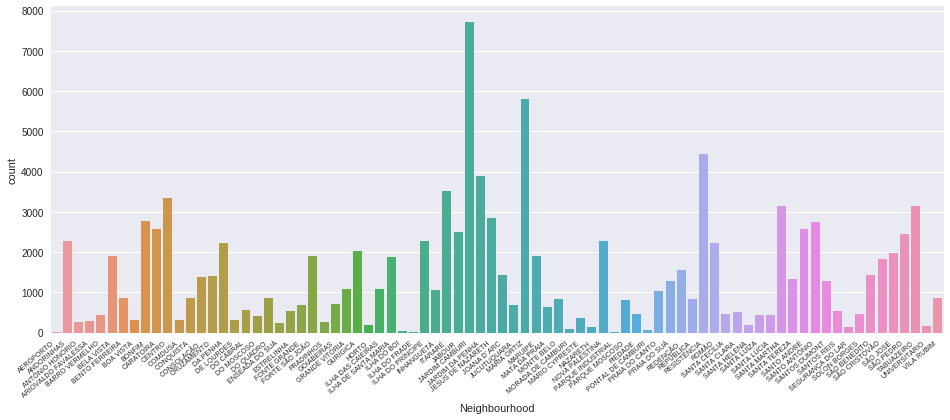

In [344]:
## Plotting an histogram with the neighborhoods sorted alphabetically. 
plt.figure(figsize=(16,6))
ax = sns.countplot(x='Neighbourhood', data=dataset, order=neighborhood)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

From the graph above, it can be noticed there are 81 different neighborhood being considered, where 8 of them register more than 3k appointments. However, in the data description (see <a href="#intro">Section 1</a></li>) it is said there are 45 health units, which leads us to consider the neighborhood as where the patient lives.  

Due to this, EDA involving the neighborhood must be carried out in a careful manner.

<a id='sec2.3.5'></a>
####  2.3.5. *No-show* class:
We want to check wheter the class values are consistent with the expected values for this database (true or false).

In [35]:
## Counting gender classes
dataset['No-show'].value_counts()

No     88207
Yes    22314
Name: No-show, dtype: int64

The total sum is consistent with the dataset length. However, as it was also noticed for the *Gender* attribute, this data are unbalanced, i.e. there are more instances pertaining to one class than other. Since this attribute represents our dataset categorization, this fact becomes more relevant for the further analysis. In other words, although we can get some useful insights from this data, we must be careful when applying this dataset to training machine learning algorithms and so on. 

<a id='sec2.4'></a>
### 2.4. Data wrangling overview

Just in order to help its reading, the dataset attributes will be rearranged to put all the date and time information together, as well as correcting the typos in the attribute names:

In [36]:
## Reading the dataset attributes (columns):
dataset.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'ScheduleTime',
       'WaitingDays', 'WaitingCategories'],
      dtype='object')

In [37]:
dataset = dataset.reindex(columns=['PatientId', 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'ScheduledDay', 'ScheduleTime', 'AppointmentDay', 'WaitingDays', 'WaitingCategories', 'SMS_received', 
       'Neighbourhood', 'No-show'])

In [38]:
## Reading again the current attribute labels:
dataset.columns

Index(['PatientId', 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'ScheduledDay', 'ScheduleTime',
       'AppointmentDay', 'WaitingDays', 'WaitingCategories', 'SMS_received',
       'Neighbourhood', 'No-show'],
      dtype='object')

In [39]:
## Renaming "No-show"to "No_show"; "Handcap" to "Handicap"; and "ScheduleTime" to "ScheduledTime":
dataset.columns = ['PatientId', 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'ScheduledDay', 'ScheduledTime', 'AppointmentDay', 'WaitingDays', 
       'WaitingCategories', 'SMS_received', 'Neighbourhood', 'No_show']

We then conclude this data wrangling step by showing an overview of the pre-processed data, i.e. the data after the wrangling and cleansing process. 

In [40]:
## Checking again the dataset information (for numerical attributes) and description (for categorical ones):
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 5642903 to 5629448
Data columns (total 16 columns):
PatientId            110521 non-null object
Gender               110521 non-null object
Age                  110521 non-null int64
Scholarship          110521 non-null int64
Hipertension         110521 non-null int64
Diabetes             110521 non-null int64
Alcoholism           110521 non-null int64
Handicap             110521 non-null int64
ScheduledDay         110521 non-null datetime64[ns]
ScheduledTime        110521 non-null object
AppointmentDay       110521 non-null datetime64[ns]
WaitingDays          110521 non-null int64
WaitingCategories    110521 non-null category
SMS_received         110521 non-null int64
Neighbourhood        110521 non-null object
No_show              110521 non-null object
dtypes: category(1), datetime64[ns](2), int64(8), object(5)
memory usage: 18.6+ MB
None


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,WaitingDays,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,10.184345,0.321043
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,15.255153,0.466879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,1.000000


In [41]:
## Visualizing few instances of the data:
dataset.head(3)

,PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,ScheduledDay,ScheduledTime,AppointmentDay,WaitingDays,WaitingCategories,SMS_received,Neighbourhood,No_show
AppointmentID,,,,,,,,,,,,,,,,
5642903,29872499824296,F,62,0,1,0,0,0,2016-04-29,18:38:08,2016-04-29,0,Same day: 0,0,JARDIM DA PENHA,No
5642503,558997776694438,M,56,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,0,Same day: 0,0,JARDIM DA PENHA,No
5642549,4262962299951,F,62,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,0,Same day: 0,0,MATA DA PRAIA,No


As it can be seen, the numerical attributes are consistent with the expected values (i.e. counting 110.521 values, with a minimum of 0 and maximum value of 1 to the boolean attributes, while in a range from 0 to 115 for the age attribute). In the same way, the categorical attributes are as expected.

-------------

<a id='eda'></a>
## 3. Exploratory Data Analysis

Once the data were trimmed and cleaned, we will move on to explore the questions posed on  <a href="#sec1.3">Section 1.3</a></li>. Besides it was identified in <a href="#wrangling">Section 2</a></li> that data are unbalanced, it will not be taken into account in the following analysis. Given the dataset limitations, this analysis will address the first two questions, as organized in the following topics::  

* **<a href="#EDA_question1">3.1. Exploring no-showing appointments</a>**
* **<a href="#EDA_question2">3.2. Exploring the patient profiles</a>**

Some functions will be defined below in order to facilitate the further analyzing process.

In [42]:
def get_statistics(data, bins=20):
    '''Prints basic statistics from the input data. 
    Syntax: get_statistics(data, bins=20), where:
        data = the input data series;
        bins = the number of bins to the histogram.
    '''
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins);

In [286]:
def get_total(dataframe):
    '''Return the total sum of each numerical attribute of a pandas.Dataframe.'''
    return dataframe.sum(axis=1)

In [287]:
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)

<a id='EDA_question1'></a>
### 3.1. Exploring the *no-showing appointments*
In this section we will seek to answer the following questions based on the available data:  
* What is the average waiting time between the scheduling date and the appointment date?
* Is there any relation between the waiting time and the no-showing appointments?
* How the *no-showing appointments* are distributed among the health units (neighborhood)?

In orther to find the answers, we will now focus on those attributes related specifically to appointments: *patient ID; scheduled date; appointment date; and health unit neighborhood*, as well as those attributes resulting from these.

<a id='sec3.1.1'></a>
#### 3.1.1. Waiting time between the scheduling and the appointment date
To get an overall idea of the no-showing appointments, we will start analyzing the basic statistics of the waiting days:

Mean: 10.1843450566
Standard deviation: 15.2550844826
Minimum: 0
Maximum: 179
Median: 4.0


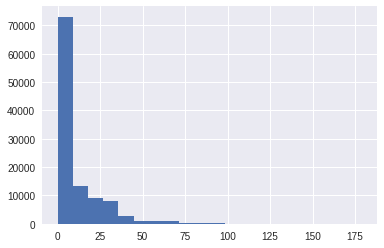

In [43]:
get_statistics(dataset.WaitingDays)

The **average waiting is about 10 days**, with a standard deviation of approximately 15 days. These values suggest that this distribution is not normal, since the mean is not in the center, as confirmed by its histogram. 

Looking back at the *waitingdays* dataframe created in <a href="#sec2.3.3">Section 2.3.3</a>, we can compare the no-showing rate (i.e. the number of patients that missed the appointment against those who attended) in relation to each of *WaitingDays* categories.

In [44]:
## Showing the data again:
waitingdays

No-show,No,Yes,No-showing rate
WaitingDays,,,
Same day: 0,36770.0,1792.0,4.873538
Short: 1-3,11316.0,3359.0,29.683634
Week: 4-7,13097.0,4413.0,33.694739
Fortnight: 8-15,9362.0,4166.0,44.499039
Month: 16-30,10709.0,5159.0,48.174433
Quarter: 31-90,6792.0,3369.0,49.602473
Semester: 91-180,161.0,56.0,34.782609
Very long: >180,0.0,0.0,NaN


This data could be better understood graphically. To do so, we will first manipulate the *waitingdays* dataframe in
order to get the percentual information. We will also multiply by *500* the *No-showing rate* values in order to put this attribute in the same scale of the chart. For last, we will show all these information in the same chart, based on the codes proposed in <a href="#[6]">[6]</a> and <a href="#[7]">[7]</a>.

In [45]:
## Adjusting the dataframe:
eda_waitingDays = waitingdays.copy()  #Copying the dataframe from Section 2.3.3
eda_waitingDays.reset_index(drop=False, inplace=True)  #Making the index as a column in order to be plotted.
eda_waitingDays.drop(index=7, inplace=True)  #Droppping the last row, since it's empty.

## Adding new columns:
#Transforming the 'No-showing rate' into strings with the percentual values:
eda_waitingDays['No-show percentual'] = eda_waitingDays['No-showing rate'].apply(lambda x: '{0:.2f}%'.format(x))
#Multiplying the rate values by 500 times in order to be plotted in the same scale:
eda_waitingDays['No-showing rate (500x)'] = eda_waitingDays['No-showing rate']*500

## Showing the adjusting dataframe:
eda_waitingDays

No-show,WaitingDays,No,Yes,No-showing rate,No-show percentual,No-showing rate (500x)
0,Same day: 0,36770.0,1792.0,4.873538,4.87%,2436.769105
1,Short: 1-3,11316.0,3359.0,29.683634,29.68%,14841.816896
2,Week: 4-7,13097.0,4413.0,33.694739,33.69%,16847.369627
3,Fortnight: 8-15,9362.0,4166.0,44.499039,44.50%,22249.519333
4,Month: 16-30,10709.0,5159.0,48.174433,48.17%,24087.216360
5,Quarter: 31-90,6792.0,3369.0,49.602473,49.60%,24801.236749
6,Semester: 91-180,161.0,56.0,34.782609,34.78%,17391.304348


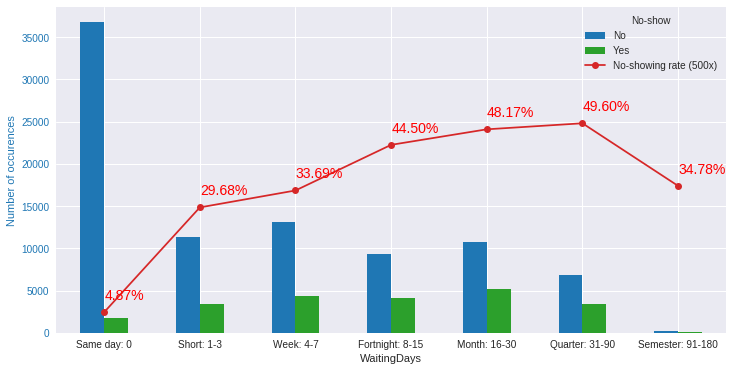

In [46]:
## Setting the graph parameters:
fig, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
colors = ['tab:blue', 'tab:green', 'tab:red']  #Defines the colors to be used

ax.set_ylabel('Number of occurences', color=colors[0])  #Set the y-axis color and label
ax.tick_params(axis='y', labelcolor=colors[0])

## Plotting the bar chart:
eda_waitingDays[['WaitingDays', 'No', 'Yes']].plot(x='WaitingDays', kind='bar', ax=ax, color=colors[0:2])

## Plotting the line chart:
eda_waitingDays[['WaitingDays', 'No-showing rate (500x)']].plot(x='WaitingDays', linestyle='-', marker='o', ax=ax, color=colors[2])
#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,eda_waitingDays['No-showing rate (500x)'], eda_waitingDays['No-show percentual']):
    plt.text(a,b+1500,c, color='red', fontsize=14)

plt.show()

Through the chart above, it becomes evident that **the *no-showing rate* increases as the waiting gets longer**. It reaches the lower rates when the attendance occurs in the same day it was scheduled. We can then associate it with the emergency care or even when the patient goes to the health unit without previous scheduling.  

It is curious to notice that after one quarter waiting there is a slight return to the patient assiduity, when the *no-showing rate* downs from *49.6%* to *%34.78*. This question will be explored deeply in the next section.

<a id='sec3.1.2'></a>
#### 3.1.2. A return to assiduity
As noted in the chart above, the *no-showing rate* increases along the waiting time, however it starts to decrease after one quarter waiting. To get insights for the next analysis (the patient profiles will be explored in <a href="EDA_question2">Section 3.2</a>), we will now compare some basic statistics of the numerical attributes from the group patients attending to the appointments in the same day **(Group I)** and after one quarter **(Group II)**. 

In [47]:
## Group I - Describing the numerical attributes for the same day appointments:
group_I = dataset[dataset['WaitingCategories'] == 'Same day: 0'].describe()
group_I

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,WaitingDays,SMS_received
count,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.0,38562.0
mean,34.452311,0.108656,0.175536,0.066542,0.039884,0.024169,0.0,0.0
std,23.221671,0.311211,0.380429,0.249231,0.195689,0.153575,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [48]:
## Group II - Describing the numerical attributes for the semester appointments:
group_II = dataset[dataset['WaitingDays']>90].describe()
group_II

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,WaitingDays,SMS_received
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,60.788018,0.064516,0.539171,0.133641,0.013825,0.069124,121.410138,0.640553
std,25.672460,0.246238,0.499616,0.341052,0.117034,0.254252,31.423518,0.480948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,0.000000
50%,69.000000,0.000000,1.000000,0.000000,0.000000,0.000000,109.000000,1.000000
75%,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,155.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,1.000000


Despite the number of instances are in a proportion of 1:217, the basic statistics from these two groups of patients reveals interesting characteristics we can therefore associate to the reduction of the no-showing rate. To help finding them, we will make use of the *find_differences()* function, as defined below, applied to the *mean* values of each group.

In [49]:
def find_differences(serie1, serie2, pct_diff):
    '''Given two data series [serie1, serie2], compare those attributes and return 
    those who difference among them is higher than pct_diff (e.g. 50% must be entered as 0.5).
    The index of both series must be identical.
    '''
    try:
        if (serie1.index.all() == serie2.index.all()):
            ## Calculating the differences
            testA = serie1 / serie2
            testB = serie2 / serie1
            checkA = [x for x in testA if (x > pct_diff)&(x<1)]
            checkB = [x for x in testB if (x > pct_diff)&(x<1)]
            
            ## Showing which attributes in serie1 are less than "pct_diff" of those in serie1:
            print('Attributes in "Serie I" whose values are less than {0:.1f}% of those in "Serie II":'.format(pct_diff*100))
            for item in checkA:
                print('\t{0}: {1:.1f}%'.format(testA[testA == item].index[0], item*100))
            
            ## Showing which attributes of serie2 are "pct_diff" higher in serie1:
            print('Attributes in "Serie II" whose values are less than {0:.1f}% of those in "Serie I":'.format(pct_diff*100))
            for item in checkB:
                print('\t{0}: {1:.1f}%'.format(testB[testB == item].index[0], item*100))
    except ValueError:
        print('The series must have same index and length!')
    return    

In [52]:
find_differences(group_I.loc['mean'], group_II.loc['mean'], 0.30)

Attributes in "Serie I" whose values are less than 30.0% of those in "Serie II":
	Age: 56.7%
	Hipertension: 32.6%
	Diabetes: 49.8%
	Handicap: 35.0%
Attributes in "Serie II" whose values are less than 30.0% of those in "Serie I":
	Scholarship: 59.4%
	Alcoholism: 34.7%


Based on the findings above, the both group of patients can be characterized as follow, considering those attributes with a difference in the mean values higher than 30% of the other group:

* Group I - Same day scheduling appointment:
  * Average age: 34.5 years old (young adults)
  * Scholarship: **10% receives scholarship**
  * Alcoholism: present in **3.9% of the group individuals**
  * Hipertension: present in 17.5% of the group individuals
  * Diabetes: present in 6.6% of the group individuals
  * Handicap: present in 2.4% of the group individuals
  
* Group II - A semester waiting between schedulling and the appointment:
  * Average age: **60.8 years old (senior)**
  * Scholarship: 6.4% receives scholarship
  * Alcoholism: present in 1.4% of the group individuals
  * Hipertension: present in **53.9% of the group individuals**
  * Diabetes: present in **13.4% of the group individuals**
  * Handicap: present in **6.9% of the group individuals**  
  
From this analysis, one hipothesys for the *no-showing rate* reduction for waiting periods higher than a quarter can be assigned to the patient profile: **elderly people as well as those with chronic diseases who require regular medical follow-up tend to schedule long-term appointments and attend to them.**

<a id='sec3.1.3'></a>
#### 3.1.3 Neighborhood analysis
This last analysis seeks to find out how the *no-showing appointments* are distributed among the health units. In other words, how many appointments are registered to each health unit and if they are attended to or not. To find this out, we will carry two slightly distinct analysis based on the neighborhood attribute: 
* (i) How the absence number is distributed along the neighborhoods? 
* (ii) We have already seen that the no-showing rate increases as the waiting gets longer. Is the validity of this statement indifferent to geographical location?

To find this out, we will first group the dataset by the neighborhood names, followed by some data manipulation to gather the desired information for each question.

#### (i) No-showing rate by neighborhood

#### (ii) Relative absence: neighborhoods versus waiting categories

In [331]:
## Using the pandas.groupby() method to produce a pivot table:
neighbors_II = dataset.groupby(by=['Neighbourhood','No_show']).WaitingCategories.value_counts().sort_index()
neighbors_II.head(8)

Neighbourhood  No_show  WaitingCategories
AEROPORTO      No       Month: 16-30           1
                        Quarter: 31-90         1
                        Same day: 0            3
                        Short: 1-3             1
                        Week: 4-7              1
               Yes      Month: 16-30           1
ANDORINHAS     No       Fortnight: 8-15      232
                        Month: 16-30         218
Name: WaitingCategories, dtype: int64

In [332]:
## Manipulating the data:
neighbors_II = neighbors_II.unstack(1).unstack()  #Converting the groupby object into a dataset
neighbors_II.fillna(value=0, inplace=True)  #Replacing NaN values by zero
neighbors_II = df_row_normalize(neighbors_II)  #Normalizing its values by the total of each row
neighbors_II = neighbors_II['Yes']  #Keeping only the values related to the absence
## Converting the normalized float values to percentual int values:
neighbors_II = (neighbors_II*100).astype('int64')
#neighbors_II = neighbors_II.astype('int64')  #Converting the float values to int64
neighbors_II = neighbors_II.reindex(columns=['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])

In [217]:
fantInt.columns

Index(['Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Same day: 0',
       'Semester: 91-180', 'Short: 1-3', 'Week: 4-7'],
      dtype='object', name='WaitingCategories')

In [206]:
dataset.WaitingCategories.unique()

[Same day: 0, Short: 1-3, Week: 4-7, Fortnight: 8-15, Month: 16-30, Quarter: 31-90, Semester: 91-180]
Categories (7, object): [Same day: 0 < Short: 1-3 < Week: 4-7 < Fortnight: 8-15 < Month: 16-30 < Quarter: 31-90 < Semester: 91-180]

In [225]:
fantInt = fantInt.reindex(columns=['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])

In [218]:
fantInt.columns

Index(['Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Same day: 0',
       'Semester: 91-180', 'Short: 1-3', 'Week: 4-7'],
      dtype='object', name='WaitingCategories')

In [212]:
fantInt.columns = ['4. Fortnight', '5. Month', '6. Quarter', '1. Same day',
       '7. Semester', '2. Short', '3. Week']

In [333]:
neighbors_II.head(5)

WaitingCategories,Same day: 0,Short: 1-3,Week: 4-7,Fortnight: 8-15,Month: 16-30,Quarter: 31-90,Semester: 91-180
Neighbourhood,,,,,,,
AEROPORTO,0,0,0,0,12,0,0
ANDORINHAS,1,3,5,5,6,2,0
ANTÔNIO HONÓRIO,2,0,2,1,9,2,0
ARIOVALDO FAVALESSA,1,3,5,2,8,0,0
BARRO VERMELHO,2,2,4,6,4,0,0


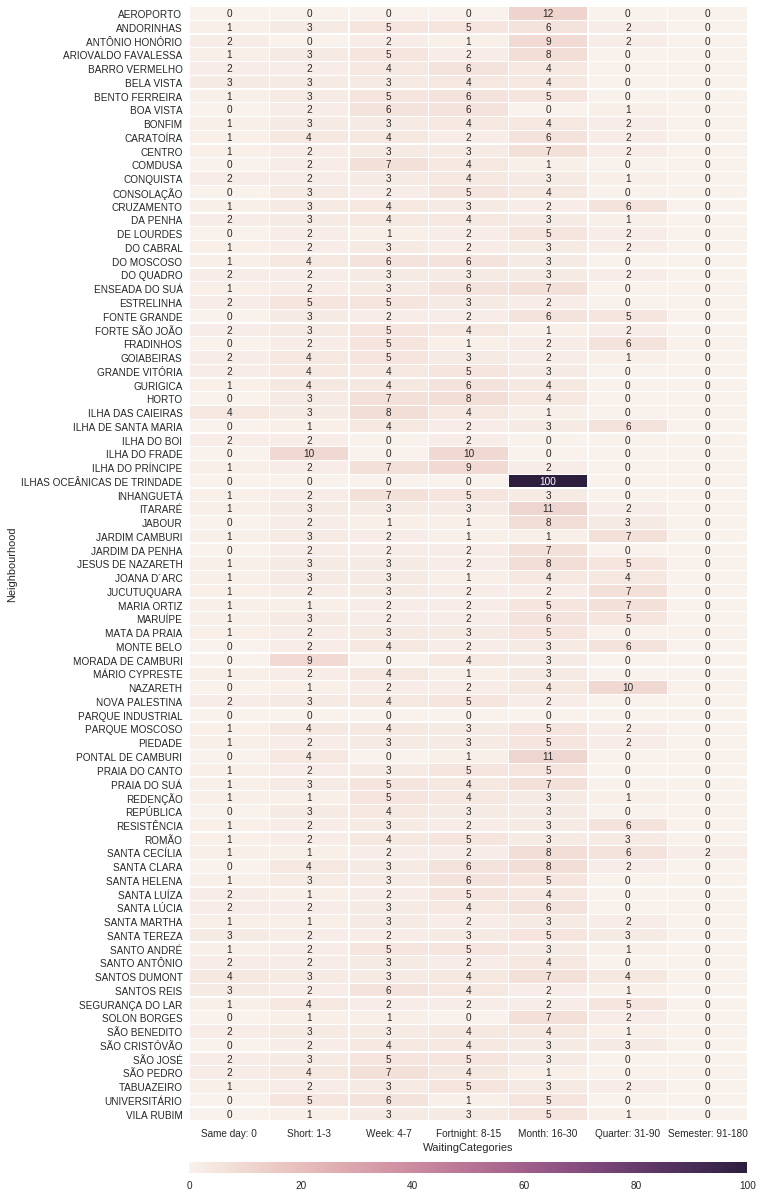

In [334]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 25))
sns.heatmap(neighbors_II, annot=True, fmt='d', linewidths=.3, ax=ax, cbar_kws={'orientation':"horizontal", 'pad':0.03, 'aspect':50})

** Incluir a referência sobre o "colorbar": https://matplotlib.org/api/colorbar_api.html**

-----------

In [274]:
fantInt.head(5)

WaitingCategories,Same day: 0,Short: 1-3,Week: 4-7,Fortnight: 8-15,Month: 16-30,Quarter: 31-90,Semester: 91-180
Neighbourhood,,,,,,,
AEROPORTO,0,0,0,0,1,0,0
ANDORINHAS,30,71,117,118,137,48,0
ANTÔNIO HONÓRIO,7,1,7,4,25,6,0
ARIOVALDO FAVALESSA,5,11,15,6,24,1,0
BARRO VERMELHO,12,12,17,29,18,3,0


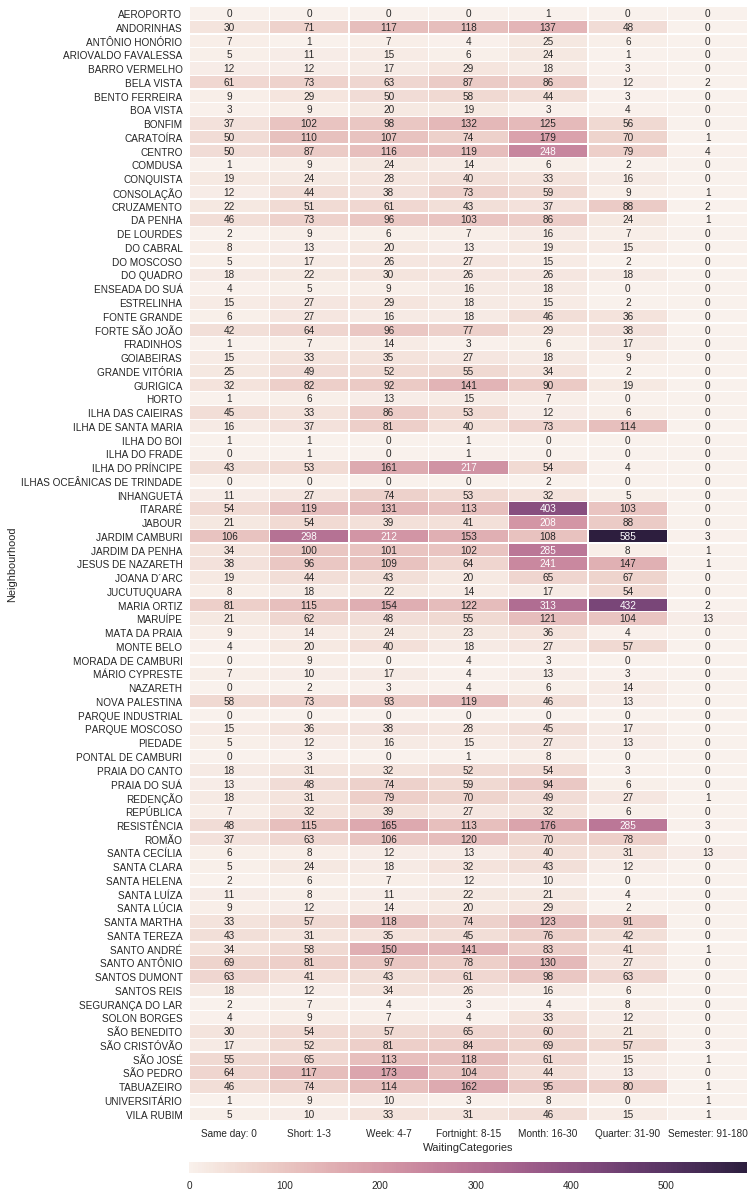

In [247]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 25))
sns.heatmap(fantInt, annot=True, fmt='d', linewidths=.3, ax=ax, cbar_kws={'orientation':"horizontal", 'pad':0.03, 'aspect':50})

<a id='sec3.1.3'></a>
#### 3.1.3 Neighborhood
This last analysis seeks to find out how the *no-showing appointments* are distributed among the health units. In other words, how many appointments are registered to each health unit and if they are attended to or not. To find this out, we will list all the neighborhood names as the index of a new dataset.

In [269]:
neighbors = dataset.groupby(by='Neighbourhood').No_show.value_counts().sort_index()
neighbors = neighbors.unstack()
neighbors.reset_index(inplace=True)
neighbors.sort_values(by=['No','Yes'],ascending=False,inplace=True)
neighbors.fillna(value=0, inplace=True)
neighbors['Total'] = neighbors['No'] + neighbors['Yes']
print(neighbors.head(3))
neighbors.describe()

No_show   Neighbourhood      No     Yes   Total
38       JARDIM CAMBURI  6252.0  1465.0  7717.0
43          MARIA ORTIZ  4586.0  1219.0  5805.0
59          RESISTÊNCIA  3525.0   905.0  4430.0


No_show,No,Yes,Total
count,81.000000,81.000000,81.000000
mean,1088.975309,275.481481,1364.456790
std,1096.253153,277.932911,1369.122347
min,0.000000,0.000000,1.000000
25%,321.000000,69.000000,413.000000
50%,709.000000,179.000000,851.000000
75%,1562.000000,428.000000,2018.000000
max,6252.000000,1465.000000,7717.000000


Normalizing the neighborhood information: since there are health units with a lot of patients and others with just a few one, we will divide each number by the total.

In [267]:
normalNeighbor = neighbors.copy()
normalNeighbor['No'] = neighbors.No / neighbors.Total
normalNeighbor['Yes'] = neighbors.Yes / neighbors.Total
normalNeighbor['Total'] = neighbors.Total / neighbors.Total
normalNeighbor.sort_values(by='Neighbourhood',ascending=True,inplace=True)
normalNeighbor.head(3)

No_show,Neighbourhood,No,Yes,Total
0,AEROPORTO,0.875000,0.125000,1.0
1,ANDORINHAS,0.769673,0.230327,1.0
2,ANTÔNIO HONÓRIO,0.815498,0.184502,1.0


/home/tbnsilveira/anaconda3/envs/analytics3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


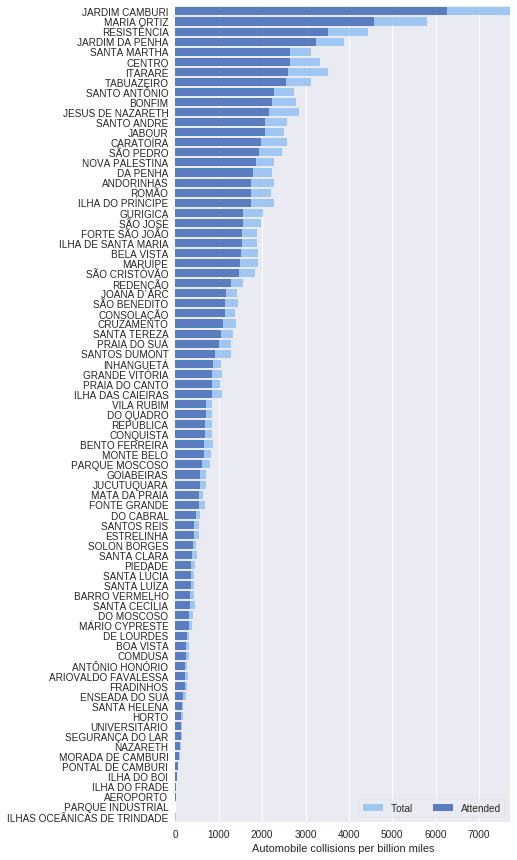

In [155]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=neighbors,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=neighbors,
            label="Attended", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7720), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

/home/tbnsilveira/anaconda3/envs/analytics3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


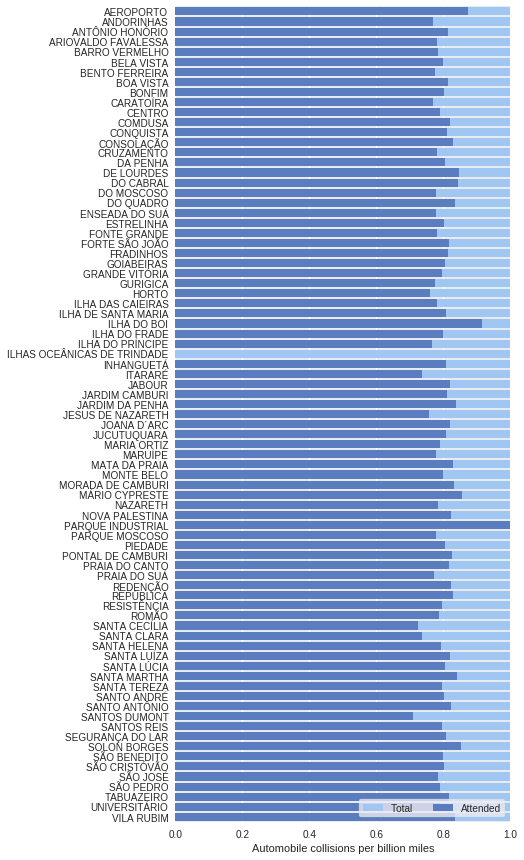

In [156]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=normalNeighbor,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=normalNeighbor,
            label="Attended", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

------------

<a id='EDA_question2'></a>
### 3.2. Exploring the patient profiles
After understanding the characteristics of the missed appointments, as explored in the last section, we will now analyse the patient profiles driven by the following questions:
* How the *no-shows* are distributed among the patients? 
* Is there any common characteristics among those patients that miss appointments?
* Patients suffering from serious illnesses are more assiduous?

In [ ]:
data_missed = dataset[dataset['No_show'] == 'Yes']

In [ ]:
data_missed.columns

In [ ]:
corr = dataset.corr()

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<a id='conclusions'></a>
## 4. Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<a id='references'></a>
## References

<a id='[1]'></a>[1] Wikipedia contributors. Brazil. Wikipedia, The Free Encyclopedia. February 9, 2018, 22:06 UTC. Available at: https://en.wikipedia.org/w/index.php?title=Brazil&oldid=824851232. Accessed in February 10, 2018.

<a id='[2]'></a>[2] Kaggle. *Medical Appointment No Shows*. Reviewed dataset. Available at: https://www.kaggle.com/joniarroba/noshowappointments. Accessed in February 10, 2018.

<a id='[3]'></a>[3] Victora, C. G., Barreto, M. L., Leal, M. D. C., Monteiro, C. A., Schmidt, M. I., Paim, J. S., ... & Reichenheim, M. E. (2011). *Condições de saúde e inovações nas políticas de saúde no Brasil: o caminho a percorrer* (in Portuguese). Available at: https://repositorio.ufba.br/ri/handle/ri/5973. Accessed in February 12, 2018.

<a id='[4]'></a>[4] Pandas 0.22.0 documentation. Available at: https://pandas.pydata.org/pandas-docs/stable/timeseries.html. Accessed in February 20, 2018.

<a id='[5]'></a>[5] Twelve useful Pandas techniques in Python for data manipulation. Analytics Vhidya. Available at: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/. Accessed in February 22, 2018.

<a id='[6]'></a>[6] Stack Overflow. Plot pandas DataFrame as bar and line on the same one chart. Available at https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart. Accessed in February 24, 2018.

<a id='[7]'></a>[7] Stack Overflow. Writing numerical numerical values on the plot with Matplotlib. Available at https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib. Accessed in February 24, 2018.

## Backlog (Verificar a utilidade disso na análise)

> Aqui o ponto principal será identificar de onde são esses dados. Das informações disponíveis no Kagle, já sabe-se que são de Vitória, ES. Portanto, vai ser muito interessante cruzar com os dados demográficos dessa cidade, a partir do IBGE.
>

##### About the Introduction Section
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Data Cleaning (Replace this with more specific notes!)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

##### Ages over hundred

In [ ]:
dataset.describe()

In [ ]:
## Plotting the attribute distribution:
plt.hist(dataset['Age'], bins=115);

In [ ]:
sns.distplot(dataset['Age'])

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.